# LAB 3 MOS: Newton Raphson y Gradiente Descendente

- Samuel Augusto Hernandez 202213772
- Tomas Alberto Rodriguez 2022128686

## Problema 1: Newton-Raphson en 2D para Polinomios Cúbicos

$$ f(x) = 3 \cdot x^3 - 10 \cdot x^2 - 56 \cdot x +50 $$

$$ f'(x) = 9 \cdot x^2 - 20 \cdot x - 56 $$

$$ f''(x) = 18 \cdot x - 20 $$

### Implementación algoritmo Newton-Raphson (1 dimensión)


+------+---------+--------+---------------+---------------+
|   x0 |   alpha |   raiz | tipo          |   iteraciones |
+======+=========+========+===============+===============+
|   -6 |     0.6 |  -1.62 | Máximo local. |            23 |
+------+---------+--------+---------------+---------------+
|   -6 |     1   |  -1.62 | Máximo local. |             5 |
+------+---------+--------+---------------+---------------+
|   -4 |     0.6 |  -1.62 | Máximo local. |            22 |
+------+---------+--------+---------------+---------------+
|   -4 |     1   |  -1.62 | Máximo local. |             5 |
+------+---------+--------+---------------+---------------+
|   -2 |     0.6 |  -1.62 | Máximo local. |            19 |
+------+---------+--------+---------------+---------------+
|   -2 |     1   |  -1.62 | Máximo local. |             3 |
+------+---------+--------+---------------+---------------+
|    0 |     0.6 |  -1.62 | Máximo local. |            18 |
+------+---------+--------+-------------

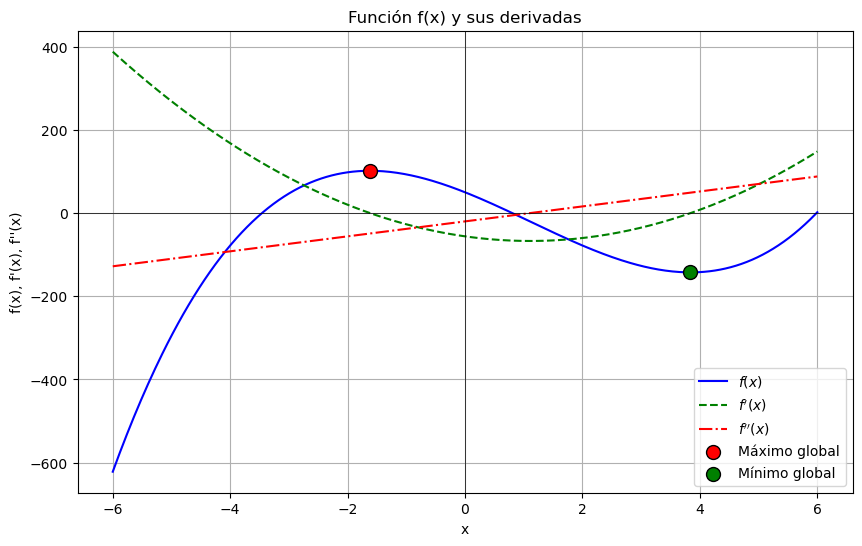

+-------+----------+
|     X |        Y |
+=======+==========+
| -1.62 |  101.721 |
+-------+----------+
|  3.84 | -142.627 |
+-------+----------+


In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

x = sp.symbols('x')
a = 3
b = 10
c = 56
d = 50
# Función de tercer grado
f = a*x**3 - b*x**2 - c*x + d

# f'(x) Derivada
f_prima = sp.diff(f,x)
# f''(x) Segunda derivada
f_doble_prima = sp.diff(f_prima, x)

# Funciones numericas
f_func = sp.lambdify(x, f, 'numpy')
f_derivada = sp.lambdify(x, f_prima, 'numpy')
f_segunda_derivada = sp.lambdify(x, f_doble_prima, 'numpy')

# Algoritmo de Newton-Raphson
def newton_raphson(f_prime_func, f_double_prime_func, x0, alpha=1.0, tol=1e-6, max_iter=100):
    x_k = x0
    # Iteraciones con un maximo
    for k in range(max_iter):
        # Calcular gradiente
        grad_f = f_prime_func(x_k)
        # Calcular hessiana
        hess_f = f_double_prime_func(x_k) # Como es una dimension es la segunda derivada
        
        # Verificar si la segunda derivada es cercana a cero., Agregar 1 para que pase a otro punto sin cambiar la división
        if abs(hess_f) < 1e-12:
            hess_f = abs(hess_f)+ 1
        
        # Calcular dk
        d_k = -grad_f / hess_f
        
        # Actualizar x_k
        x_k = x_k + alpha * d_k
        
        # Verificar la condición de parada
        if abs(grad_f) < tol:
            return x_k, k
    
    print("Se alcanzó el número máximo de iteraciones.")
    return x_k, k

def caracterizacion_extremo(f_double_prime_func, x_k):
    # Evaluar la segunda derivada en el punto
    f_double_prime_at_root = f_double_prime_func(x_k)
    
    # Signo de segunda derivada
    if f_double_prime_at_root > 0:
        return "Mínimo local."
    elif f_double_prime_at_root < 0:
        return "Máximo local."
    else:
        return "Punto silla"

# Graficar la función, sus derivadas y los puntos
def graficar_funcion(f_func, f_derivada, f_segunda_derivada, puntos_encontrados, rango):
    x_vals = np.linspace(-rango, rango, 400)
    # Valores de función, derivada y segunda derivada
    f_vals = f_func(x_vals)
    f_prime_vals = f_derivada(x_vals)
    f_double_prime_vals = f_segunda_derivada(x_vals)
    
    # Máximos y mínimos globales
    valores_funcion = [f_func(p) for p in puntos_encontrados]
    max_global = max(valores_funcion)
    min_global = min(valores_funcion)
    
    # Puntos
    max_punto = puntos_encontrados[valores_funcion.index(max_global)]
    min_punto = puntos_encontrados[valores_funcion.index(min_global)]

    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, f_vals, label='$f(x)$', color='blue')
    plt.plot(x_vals, f_prime_vals, label="$f'(x)$", linestyle='--', color='green')
    plt.plot(x_vals, f_double_prime_vals, label="$f''(x)$", linestyle='-.', color='red')
    
    # Añadir los puntos encontrados a la gráfica
    for p in puntos_encontrados:
        if p == max_punto:
            plt.scatter(p, f_func(p), color='red', zorder=5, label='Máximo global', s=100, edgecolor='black')
        elif p == min_punto:
            plt.scatter(p, f_func(p), color='green', zorder=5, label='Mínimo global', s=100, edgecolor='black')
        else:
            plt.scatter(p, f_func(p), color='black', zorder=5, label='Extremos locales', s=100, edgecolor='black')
    
    plt.title("Función f(x) y sus derivadas")
    plt.xlabel('x')
    plt.ylabel('f(x), f\'(x), f\'\'(x)')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.legend()
    plt.grid(True)
    plt.show()



def analizar_convergencia_y_graficar(f_func, f_derivada, f_segunda_derivada, valores_iniciales, valores_alpha, rango):
    puntos_encontrados = []
    convergencia = []
    headers = ["x0", "alpha", "raiz", "tipo", "iteraciones"]
    
    # Experimentar con todos los valores iniciales y alphas
    for x0 in valores_iniciales:
        for alpha in valores_alpha:
            x_k, k = newton_raphson(f_derivada, f_segunda_derivada, x0, alpha=alpha)
            if x_k is not None:
                tipo = caracterizacion_extremo(f_segunda_derivada, x_k)
                row = [x0, alpha, round(x_k, 2), tipo, k]
                convergencia.append(row)
                if round(x_k, 2) not in puntos_encontrados:
                    x_k = round(x_k, 2)
                    puntos_encontrados.append(x_k)

    # Imprimir resultados de la convergencia
    print(tabulate(convergencia, headers=headers, tablefmt="grid"))

    # Graficar la función con los puntos encontrados
    graficar_funcion(f_func, f_derivada, f_segunda_derivada, puntos_encontrados, rango)

    # Imprimir tabla con los puntos encontrados y sus valores
    table_data = []
    for p in puntos_encontrados:
        table_data.append([p, f_func(p)])

    headers = ["X", "Y"]
    print(tabulate(table_data, headers=headers, tablefmt="grid"))




analizar_convergencia_y_graficar(f_func, f_derivada, f_segunda_derivada, [-6, -4, -2, 0, 2, 4, 6], [0.6, 1.0], 6)


### Analisis de comportamiento de convergencia

En este caso, se realizaron múltiples ejecuciones del algoritmo de Newton-Raphson con diferentes valores iniciales X_0 dentro del intervalo [-6, 6] y diferentes valores para alpha (0.6 y 1.0). La raíz encontrada en cada ejecución es consistente en los valores de X_0 y alpha, lo que sugiere que el algoritmo ha convergido correctamente en cada caso. 

Los puntos iniciales más cercanos a los puntos críticos de la función f(x) (es decir, los máximos y mínimos locales) convergen a esos puntos. 

- Para valores iniciales entre -6 y 0, la raíz encontrada se aproxima al maximo local -1,62
- Para valores iniciales entre 2 y 6, la raíz encontrada se aproxima al mínimo local 3,84

En la tabla de resultados, se evidencia que con alpha = 1.0 se tienen en todos los casos menos iteraciones (3-5) respecto a alpha = 0.6 (18-23)

## Problema 2: Análisis de Extremos Locales y Globales

$$ f(x) = x^5 - 8 \cdot x^3 - 10 \cdot x + 6 $$

$$ f'(x) = 5 \cdot x^4 - 24 \cdot x^2 - 10 $$

$$ f''(x) = 20 \cdot x^3 - 48 \cdot x $$

+------+---------+--------+---------------+---------------+
|   x0 |   alpha |   raiz | tipo          |   iteraciones |
+======+=========+========+===============+===============+
|   -3 |       1 |  -2.08 | Máximo local. |             6 |
+------+---------+--------+---------------+---------------+
|   -2 |       1 |  -2.08 | Máximo local. |             4 |
+------+---------+--------+---------------+---------------+
|   -1 |       1 |  -0.68 | Mínimo local. |             3 |
+------+---------+--------+---------------+---------------+
|    0 |       1 |  -2.08 | Máximo local. |            11 |
+------+---------+--------+---------------+---------------+
|    1 |       1 |   0.68 | Máximo local. |             3 |
+------+---------+--------+---------------+---------------+
|    2 |       1 |   2.08 | Mínimo local. |             4 |
+------+---------+--------+---------------+---------------+
|    3 |       1 |   2.08 | Mínimo local. |             6 |
+------+---------+--------+-------------

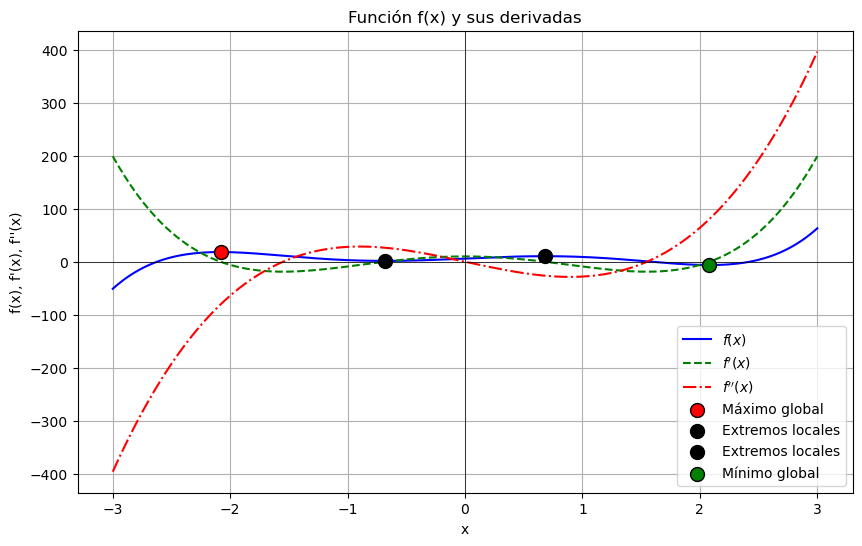

+-------+----------+
|     X |        Y |
+=======+==========+
| -2.08 | 18.2584  |
+-------+----------+
| -0.68 |  1.57006 |
+-------+----------+
|  0.68 | 10.4299  |
+-------+----------+
|  2.08 | -6.2584  |
+-------+----------+


In [3]:
x = sp.symbols('x')
a = 1
b = 0
c = -8
d = 0
e = 10
g = 6
# Función de tercer grado
f2 = a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + g

# f'(x) Derivada
f_prima = sp.diff(f2,x)
# f''(x) Segunda derivada
f_doble_prima = sp.diff(f_prima, x)

# Funciones numericas
f_func = sp.lambdify(x, f2, 'numpy')
f_derivada = sp.lambdify(x, f_prima, 'numpy')
f_segunda_derivada = sp.lambdify(x, f_doble_prima, 'numpy')

analizar_convergencia_y_graficar(f_func, f_derivada, f_segunda_derivada, [-3, -2, -1, 0, 1, 2, 3], [1.0], 3)

### Analisis de comportamiento de convergencia

En este caso, se realizaron múltiples ejecuciones del algoritmo de Newton-Raphson con diferentes valores iniciales X_0 dentro del intervalo [-3, 3] y alpha = 1.0. La raíz encontrada en cada ejecución es consistente en los valores de X_0 y alpha, lo que sugiere que el algoritmo ha convergido correctamente en cada caso.

Se escogio ese alpha ya que fue el que mejor resultado dio en el punto anterior

Los puntos iniciales más cercanos a los puntos críticos de la función f(x) (es decir, los máximos y mínimos locales) convergen a esos puntos. 

- Para valores iniciales -3 y -2, la raíz encontrada se aproxima al maximo local en -2.08
- Para el valor inicial -1, la raíz encontrada se aproxima al mínimo local en -0.68
- Para el valor inicial 1, la raíz encontrada se aproxima al mínimo local en 0.68
- Para valores iniciales 3 y 2, la raíz encontrada se aproxima al maximo local en 2.08

el método ha fallado en 
$$x_0=0$$
lo cual se debe a que la segunda derivada es cero en ese punto, por lo que en ese punto agrega 1 a la hessiana (para que no haga un error por dividir entre cero)

## Problema 3: Newton-Raphson Multidimensional

### Parte a: Función de Rosenbrock (3D)

$$ f(x, y) = (x - 1)^2 + 100 (y - x^2)^2 $$

$$
\nabla f(x, y) = \begin{bmatrix}
2(x - 1) - 400x(y - x^2) \\
200(y - x^2)
\end{bmatrix}
$$

$$
H_f(x, y) =
\begin{bmatrix}
1200x^2 - 400y + 2 & -400x \\
-400x & 200
\end{bmatrix}
$$

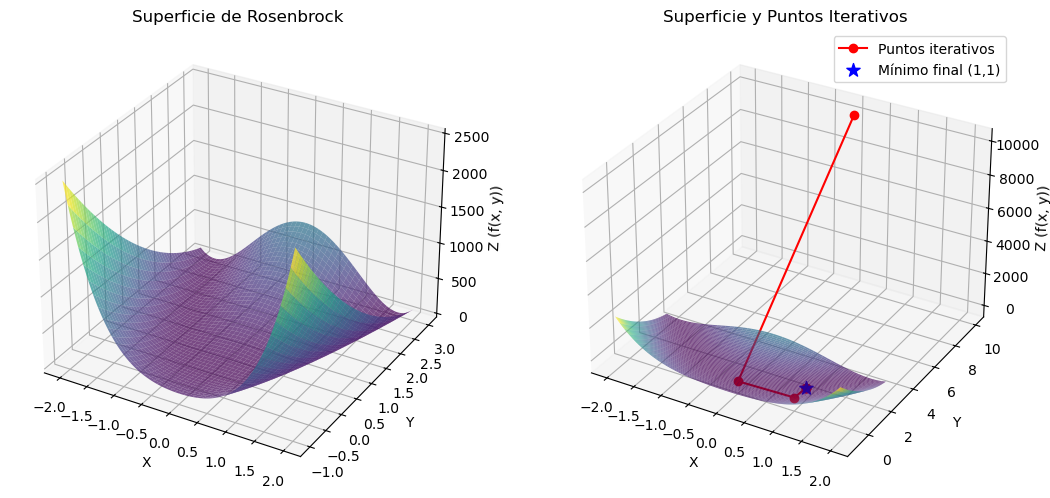

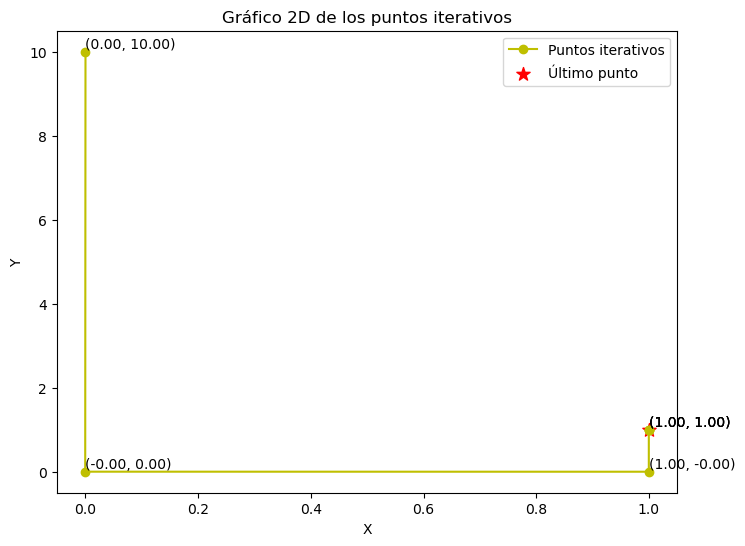

+------------------------+------------------------+-----------------------+-----------+
|           x            |           y            |           z           | Iteracion |
+------------------------+------------------------+-----------------------+-----------+
|          0.0           |          10.0          |        10001.0        |     0     |
| -0.0005002501250625312 |          0.0           |  1.0010007505065754   |     1     |
|   0.9999499274310716   | -0.0010007004026949503 |  100.18019265735738   |     2     |
|   0.9999501763253015   |   0.9999003551329394   | 2.482398560464308e-09 |     3     |
|   0.9999999999999993   |   0.9999999975176002   | 6.162302357355922e-16 |     4     |
|          1.0           |          1.0           |          0.0          |     5     |
+------------------------+------------------------+-----------------------+-----------+


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# Función de Rosenbrock
def f(x, y):
    return (x - 1)**2 + 100 * (y - x**2)**2

# Gradiente de la función de Rosenbrock
def grad_f(x, y):
    df_dx = 2*(x - 1) - 400*x*(y - x**2)
    df_dy = 200*(y - x**2)
    return np.array([df_dx, df_dy])

# Matriz Hessiana de la función de Rosenbrock
def hessian_f(x, y):
    d2f_dx2 = 1200*x**2 - 400*(y) + 2
    d2f_dxdy = -400*x
    d2f_dydx = -400*x
    d2f_dy2 = 200
    return np.array([[d2f_dx2, d2f_dxdy], [d2f_dydx, d2f_dy2]])

# Método de Newton-Raphson para funciones bidimensionales
def newton_raphson_2d(grad_f, hessian_f, x0, y0, tol=1e-6, max_iter=100):
    x, y = x0, y0
    points = [(x, y)]  # Para almacenar los puntos iterativos
    for k in range(max_iter):
        grad = grad_f(x, y)
        H = hessian_f(x, y)
        # Verificar que la matriz Hessiana no sea singular
        if np.linalg.det(H) == 0:
            print("La matriz Hessiana es singular. Deteniendo iteración.")
            k = k-1
            break
        
        # Resolver el sistema H * delta = grad
        delta = np.linalg.solve(H, grad)

        # Condición de parada
        if np.linalg.norm(grad) < tol:
            k = k-1
            break
        
        # Actualización de x, y
        x, y = np.array([x, y]) - delta
        points.append((x, y))
        
    return np.array(points), k





# Graficar la superficie, los puntos iterativos y el gráfico 2D
def plot_surface_and_iterations():
    # Rango de x, y para la superficie
    x_vals = np.linspace(-2, 2, 400)
    y_vals = np.linspace(-1, 3, 400)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z = f(X, Y)

    # Inicialización del punto (x0, y0) = (0, 10)
    x0, y0 = 0, 10
    points, k = newton_raphson_2d(grad_f, hessian_f, x0, y0)

    # Extraer las coordenadas x, y de los puntos
    x_iter = points[:, 0]
    y_iter = points[:, 1]
    z_iter = f(x_iter, y_iter)

    # Gráfico 1: Solo superficie de Rosenbrock
    fig = plt.figure(figsize=(20, 16))
    ax = fig.add_subplot(131, projection='3d')
    ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z (f(x, y))')
    ax.set_title('Superficie de Rosenbrock')

    # Gráfico 2: Puntos iterativos de la optimización de Newton-Raphson
    ax2 = fig.add_subplot(132, projection='3d')
    ax2.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
    ax2.plot(x_iter[:], y_iter[:], z_iter[:], 'r-o', label='Puntos iterativos')
    ax2.scatter(x_iter[-1], y_iter[-1], z_iter[-1], color='b', label='Mínimo final (1,1)', s=100, marker='*')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z (f(x, y))')
    ax2.set_title('Superficie y Puntos Iterativos')
    ax2.legend()

    # Gráfico 3: Gráfico 2D de los puntos iterativos
    plt.figure(figsize=(8, 6))
    plt.plot(x_iter, y_iter, 'yo-', label="Puntos iterativos")
    plt.scatter(x_iter[-1], y_iter[-1], color='r', s=100, marker='*', label="Último punto")
    plt.title("Gráfico 2D de los puntos iterativos")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()

    # Etiquetar cada punto con su coordenada (x, y)
    for i in range(len(x_iter)):
        plt.text(x_iter[i], y_iter[i], f"({x_iter[i]:.2f}, {y_iter[i]:.2f})", 
                color='black', fontsize=10, verticalalignment='bottom')

    # Mostrar los gráficos
    plt.show()

    # Mostrar tabla con los valores de x, y, z, iteración k
    table = []
    for i in range(len(x_iter)):
        table.append([x_iter[i], y_iter[i], z_iter[i], i])

    print(tabulate(table, headers=["x", "y", "z", "Iteracion"], tablefmt="pretty"))

# Llamar a la función de graficado
plot_surface_and_iterations()





Analisis de convergencia hacia (1,1)

Con los datos de la tabla se evidencia claramente como el metodo va ajustando las coordenadas hacia el minimo conocido (1,1).

Se inicia en el punto (0,10) con f(x,y) = 10001
En la siguiente iteración se llega a (-0.0005,0) con f(x,y) = 1,001
En las siguientes iteraciones se acerca poco a poco a (1,1) con cambios cada vez menores hasta que se detienen las iteraciones porque el cambio no es significativo. En 5 iteraciones se llega al valor esperado

El metodo Newton-Raphson provo ser efectivo para resolver este tipo de problemas.

### Parte b: Función en 4D

$$ f(x, y, z) = (x - 1)^2 + (y - 2)^2 + (z - 3)^2 $$

$$
\nabla f(x, y) = \begin{bmatrix}
2(x-1) \\
2(y - 2) \\
2(z - 3)
\end{bmatrix}
$$

$$
H_f(x, y) =
\begin{bmatrix}
2 & 0 & 0 \\
0 & 2 & 0 \\
0 & 0 & 2 
\end{bmatrix}
$$

Proceso:

1. Iniciar con un punto inicial: $$X_0 = \{ x_0,y_0,z_0 \}$$
2. Iteraciones:
    - Actualizar el vector asi:
    $$ X_(k+1) = X_k - H_f^-1 (x_k) \cdot \nabla f(x_k) $$
    Hasta que el gradiente sea lo suficientemente pequeño
    $$||\nabla f(x_k)|| \leq ϵ$$

+-------------------+---------------------------+------------------------------+-----------------+--------------------------------------------+
|   # Punto Inicial | Punto Inicial (x, y, z)   | Punto Encontrado (x, y, z)   | Tipo de Punto   | Iteraciones                                |
+===================+===========================+==============================+=================+============================================+
|                 1 | [0, 10, 5]                | [1. 2. 3.]                   | Mínimo          | [array([ 0, 10,  5]), array([1., 2., 3.])] |
+-------------------+---------------------------+------------------------------+-----------------+--------------------------------------------+
|                 2 | [0, 0, 0]                 | [1. 2. 3.]                   | Mínimo          | [array([0, 0, 0]), array([1., 2., 3.])]    |
+-------------------+---------------------------+------------------------------+-----------------+--------------------------------------

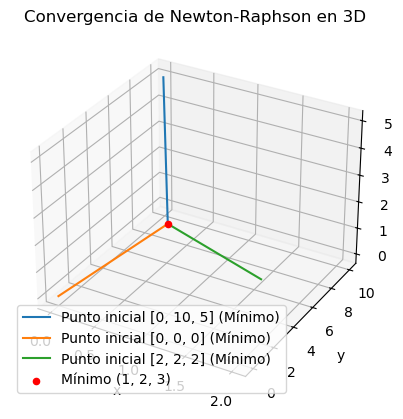

In [5]:
# Función objetivo f(x, y, z)
def f(x, y, z):
    return (x - 1)**2 + (y - 2)**2 + (z - 3)**2

# Gradiente de f(x, y, z)
def grad_f(x, y, z):
    return np.array([2 * (x - 1), 2 * (y - 2), 2 * (z - 3)])

# Matriz Hessiana de f(x, y, z)
def hessian_f(x, y, z):
    return np.array([[2, 0, 0],
                     [0, 2, 0],
                     [0, 0, 2]])

# Función para clasificar el tipo de punto (mínimo, máximo, punto silla)
def classify_point(hessian):
    # Autovalores de la matriz Hessiana
    eigenvalues = np.linalg.eigvals(hessian)
    
    # Verificamos el tipo de punto a partir de los autovalores
    if np.all(eigenvalues > 0):
        return "Mínimo"
    elif np.all(eigenvalues < 0):
        return "Máximo"
    else:
        return "Punto Silla"
    
# Función para calcular el determinante de una matriz 3x3
def determinant_3x3(A):
    return A[0, 0] * (A[1, 1] * A[2, 2] - A[1, 2] * A[2, 1]) - A[0, 1] * (A[1, 0] * A[2, 2] - A[1, 2] * A[2, 0]) + A[0, 2] * (A[1, 0] * A[2, 1] - A[1, 1] * A[2, 0])

# Función para calcular la norma de un vector de manera manual
def norma(v):
    return sum(x**2 for x in v) ** 0.5

# Función para calcular el producto punto de dos vectores
def producto_punto(v1, v2):
    return sum(v1[i] * v2[i] for i in range(len(v1)))

def inverso_3x3(A):
    # Calculamos el determinante
    det = determinant_3x3(A)
    
    if det == 0:
        raise ValueError("La matriz es singular y no tiene inversa")
    
    # Cofactores en sus posiciones transpuestas
    cofactores = np.array([
        [A[1, 1]*A[2, 2] - A[1, 2]*A[2, 1], -(A[0, 1]*A[2, 2] - A[0, 2]*A[2, 1]), A[0, 1]*A[1, 2] - A[0, 2]*A[1, 1]],
        [-(A[1, 0]*A[2, 2] - A[1, 2]*A[2, 0]), A[0, 0]*A[2, 2] - A[0, 2]*A[2, 0], -(A[0, 0]*A[1, 2] - A[0, 2]*A[1, 0])],
        [A[1, 0]*A[2, 1] - A[1, 1]*A[2, 0], -(A[0, 0]*A[2, 1] - A[0, 1]*A[2, 0]), A[0, 0]*A[1, 1] - A[0, 1]*A[1, 0]]
    ])
    
    # Inversa = cofactores / determinante
    return cofactores / det

# Método de Newton-Raphson para encontrar el mínimo
def newton_raphson_3d(x0, epsilon=1e-6, max_iter=100):
    x_k = np.array(x0)  # Punto inicial
    history = [x_k]  # Guardar historial de iteraciones
    for k in range(max_iter):
        grad = grad_f(*x_k)
        hess = hessian_f(*x_k)

        if determinant_3x3(hess) == 0:
            print("La matriz Hessiana es singular. Deteniendo iteración.")
            break
        
        # Verificar criterio de parada (norma del gradiente)
        if norma(grad) < epsilon:
            break
        
        # Actualización del punto usando Newton-Raphson
        hess_inv = inverso_3x3(hess)
        x_k = x_k - producto_punto(hess_inv,grad)
        history.append(x_k)
    
    # Clasificar el tipo de punto final
    hessian_at_min = hessian_f(*x_k)
    point_type = classify_point(hessian_at_min)
    
    return x_k, point_type, history

# Puntos iniciales
initial_points = [
    [0, 10, 5],  # Punto alejado
    [0, 0, 0],       # Otro punto cercano
    [2, 2, 2],       # Cercano al mínimo
]

# Ejecutar el algoritmo de Newton-Raphson desde varios puntos iniciales
results = []
for point in initial_points:
    min_point, point_type, history = newton_raphson_3d(point)
    results.append((initial_points.index(point)+1, point, min_point, point_type, history))

# Imprimir resultados en formato tabla con tabulate
headers = ["# Punto Inicial", "Punto Inicial (x, y, z)", "Punto Encontrado (x, y, z)", "Tipo de Punto", "Iteraciones"]
table = tabulate(results, headers, tablefmt="grid")

print(table)

# Graficar la convergencia en 3D para cada punto inicial
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for result in results:
    # Desempaquetamos la tupla de resultados
    _, initial_point, min_point, point_type, history = result
    
    history = np.array(history)
    
    ax.plot(history[:, 0], history[:, 1], history[:, 2], label=f'Punto inicial {initial_point} ({point_type})')

ax.scatter(1, 2, 3, color='red', label='Mínimo (1, 2, 3)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
ax.set_title('Convergencia de Newton-Raphson en 3D')
plt.show()


Se llega al minimo de (1,2,3) ya que es una parabola tridimensional que solo tiene ese minimo global. Esto se evidencia en que la hessiana tiene valores de 0 y 2, lo que hace que siempre sea positiva.
Se converge al minimo global (1,2,3). Se llega a este punto en solo 1 iteracion

#### Dificultades computacionales

Hacer el calculo del inverso de una matriz mas grande o del producto va a ser mas complejo con mas dimensiones.
En dimensiones mas altas, este algoritmo podria no ser eficiente con la convergencia, aunque con los ejemplos anteriores lo hace rapidamente.
Es probable que se requieran enfoques mas escalables, como el gradiente descendente


## Problema 4: Gradiente Descendente en Optimización

## Parte A

### 1. Cálculo del Gradiente

La función de pérdida es:

$$
L(x, y) = (x - 2)^2 + (y + 1)^2
$$

El gradiente $ \nabla L(x, y) $ es el vector de derivadas parciales:

$$
\frac{\partial L}{\partial x} = 2(x - 2), \quad \frac{\partial L}{\partial y} = 2(y + 1)
$$

Entonces,

$$
\nabla L(x, y) = \begin{bmatrix}
2(x - 2) \\
2(y + 1)
\end{bmatrix}
$$

### 2. Implementación del Gradiente Descendente en Python

In [6]:
# Función de pérdida
def L(x, y):
    return (x - 2)**2 + (y + 1)**2

# Gradiente de L
def grad_L(x, y):
    return np.array([2 * (x - 2), 2 * (y + 1)])

# Gradiente descendente
def gradient_descent(learning_rate, iterations, x0, y0):
    x_vals = [x0]
    y_vals = [y0]
    loss_vals = [L(x0, y0)]

    x, y = x0, y0
    for _ in range(iterations):
        grad = grad_L(x, y)
        x = x - learning_rate * grad[0]
        y = y - learning_rate * grad[1]
        x_vals.append(x)
        y_vals.append(y)
        loss_vals.append(L(x, y))
    
    return x_vals, y_vals, loss_vals


### 3. Experimentos con Diferentes Valores de $ \alpha $

Vamos a probar con $ \alpha = 0.1 $, $ \alpha = 0.5 $ y $ \alpha = 1 $

In [7]:
alphas = np.arange(0.05, 1.05, 0.05)
initial_point = (0, 0)
iterations = 100
tolerance = 1e-6 

results = []

for alpha in alphas:
    x_vals, y_vals, loss_vals = gradient_descent(alpha, iterations, *initial_point)
    final_x = x_vals[-1]
    final_y = y_vals[-1]
    final_loss = loss_vals[-1]
    distance_to_optimum = np.sqrt((final_x - 2)**2 + (final_y + 1)**2)

    convergence_iter = None
    for i, (x, y) in enumerate(zip(x_vals, y_vals)):
        dist = np.sqrt((x - 2)**2 + (y + 1)**2)
        if dist < tolerance:
            convergence_iter = i
            break

    results.append([
        alpha,
        f"{final_x:.6f}",
        f"{final_y:.6f}",
        f"{final_loss:.6e}",
        f"{distance_to_optimum:.2e}",
        convergence_iter if convergence_iter is not None else "No converge"
    ])

headers = ["alpha", "x final", "y final", "Pérdida final", "Dist. al óptimo", "Iteración de convergencia"]
print(tabulate(results, headers=headers, tablefmt="grid"))


+---------+-----------+-----------+-----------------+-------------------+-----------------------------+
|   alpha |   x final |   y final |   Pérdida final |   Dist. al óptimo | Iteración de convergencia   |
+=========+===========+===========+=================+===================+=============================+
|    0.05 |   1.99995 | -0.999973 |     3.52754e-09 |          5.94e-05 | No converge                 |
+---------+-----------+-----------+-----------------+-------------------+-----------------------------+
|    0.1  |   2       | -1        |     2.07476e-19 |          4.55e-10 | 66                          |
+---------+-----------+-----------+-----------------+-------------------+-----------------------------+
|    0.15 |   2       | -1        |     5.54668e-31 |          7.45e-16 | 41                          |
+---------+-----------+-----------+-----------------+-------------------+-----------------------------+
|    0.2  |   2       | -1        |     6.16298e-32 |          2

### 4. Graficar la trayectoria de los parámetros durante la optimización

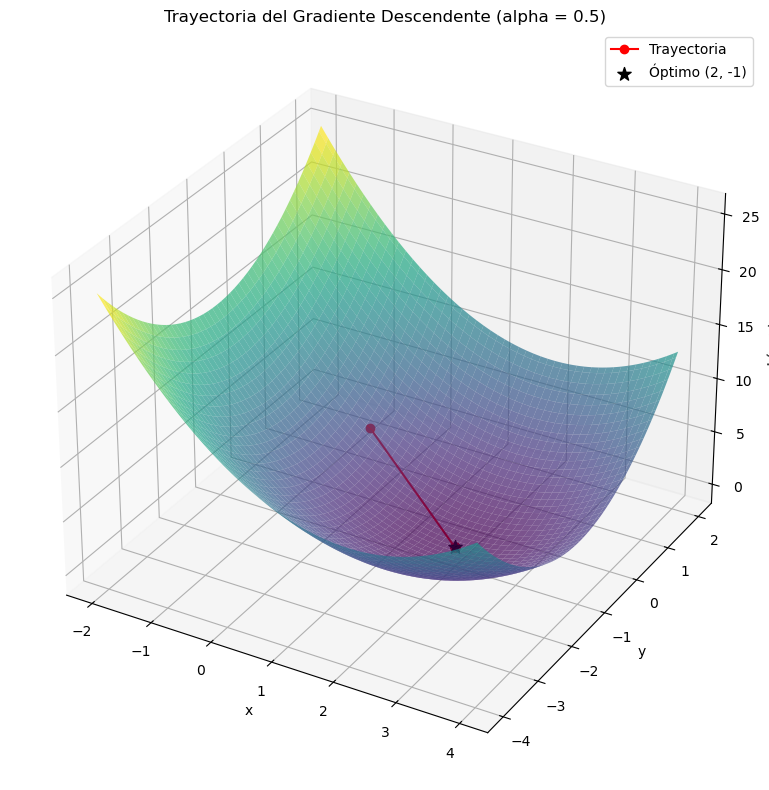

In [8]:
alpha = 0.5
iterations = 30
x0, y0 = 0, 0

x_vals, y_vals, z_vals = gradient_descent(alpha, iterations, x0, y0)

X = np.linspace(-2, 4, 100)
Y = np.linspace(-4, 2, 100)
X, Y = np.meshgrid(X, Y)
Z = L(X, Y)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, edgecolor='none')

ax.plot(x_vals, y_vals, z_vals, color='red', marker='o', label='Trayectoria')

ax.scatter(2, -1, L(2, -1), color='black', s=100, marker='*', label='Óptimo (2, -1)')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('L(x, y)')
ax.set_title(f'Trayectoria del Gradiente Descendente (alpha = {alpha})')
ax.legend()

plt.tight_layout()
plt.show()

### 5. Destacar el valor óptimo final y compararlo con la solución analítica

La **solución analítica** del problema de minimizar:

$$
L(x, y) = (x - 2)^2 + (y + 1)^2
$$

se obtiene igualando a cero el gradiente:

$$
\nabla L(x, y) = \begin{bmatrix} 2(x - 2) \\ 2(y + 1) \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}
\Rightarrow x = 2, \quad y = -1
$$

La **pérdida mínima** es:

$$
L(2, -1) = (2 - 2)^2 + (-1 + 1)^2 = 0
$$


En la tabla generada con `gradient_descent`, por ejemplo con $ \alpha = 0.5 $, se obtienen valores como:

| α   | x final   | y final   | Pérdida final | Dist. al óptimo | Iteración de convergencia |
|-----|-----------|-----------|----------------|------------------|----------------------------|
| 0.5 | 2.000000  | -1.000000 | 0     | 0       | 1                    |


**Conclusión**:
- El método de gradiente descendente logra **aproximarse muy bien** a la solución analítica cuando se elige un valor apropiado de $ \alpha $ (como 0.5).
- La **trayectoria converge exactamente** al mínimo global en un número razonable de iteraciones.
- El valor final de la pérdida es **cero**, lo que demuestra que el algoritmo funciona correctamente.


### 6. Análisis de sensibilidad al valor de $ \alpha $ y estrategias de selección óptima

#### Sensibilidad al valor de $ \alpha $

| Valor de α | Comportamiento típico                               |
|------------|------------------------------------------------------|
| Muy pequeño (α ≤ 0.05) | Convergencia muy lenta, muchas iteraciones necesarias. |
| Moderado (α entre 0.1 y 0.5) | Convergencia rápida y estable.                    |
| Grande (α ≥ 0.9)       | Puede divergir (valores explotan, pérdida crece).    |

- Un **α muy pequeño** lleva a pasos diminutos, lo cual es seguro pero ineficiente.
- Un **α muy grande** puede causar **oscilaciones o divergencia**, especialmente si la función no es perfectamente convexa o el mínimo es muy curvo.
- En nuestro caso, con una función convexa, el mejor rendimiento se obtuvo con **α = 0.5**.


#### Estrategias para seleccionar $ \alpha $

1. **Exploración inicial manual**:
   - Probar valores pequeños, medianos y grandes de α y observar la convergencia.
   - Visualizar la trayectoria sobre la superficie de pérdida.

2. **Disminución adaptativa de $ \alpha $**:
   - Reducir α progresivamente:  
     $$\alpha_t = \frac{\alpha_0}{1 + \beta t} $$
     para evitar saltos grandes en iteraciones posteriores.

4. **Búsqueda lineal (Line search)**:
   - Elegir el mejor $ \alpha $ en cada paso para minimizar localmente.

## Parte B

### 1. Gradiente y Hessiana

$$
f(x, y) = (x - 2)^2(y + 2)^2 + (x + 1)^2 + (y - 1)^2
$$

### Gradiente:

$$
\nabla f(x, y) =
\begin{bmatrix}
2(x - 2)(y + 2)^2 + 2(x + 1) \\
2(y + 2)(x - 2)^2 + 2(y - 1)
\end{bmatrix}
$$


### Hessiana:

Calculamos derivadas segundas:

$$
\frac{\partial^2 f}{\partial x^2} = 2(y + 2)^2 + 2 \\
\frac{\partial^2 f}{\partial y^2} = 2(x - 2)^2 + 2 \\
\frac{\partial^2 f}{\partial x \partial y} = 4(x - 2)(y + 2)
$$

Entonces:

$$
H_f(x, y) =
\begin{bmatrix}
2(y + 2)^2 + 2 & 4(x - 2)(y + 2) \\
4(x - 2)(y + 2) & 2(x - 2)^2 + 2
\end{bmatrix}
$$


### 2. Implementacion Algoritmos

In [9]:
def f(x, y):
    return (x - 2)**2 * (y + 2)**2 + (x + 1)**2 + (y - 1)**2

def grad_f(x, y):
    df_dx = 2 * (x - 2) * (y + 2)**2 + 2 * (x + 1)
    df_dy = 2 * (y + 2) * (x - 2)**2 + 2 * (y - 1)
    return np.array([df_dx, df_dy])

def hess_f(x, y):
    h11 = 2 * (y + 2)**2 + 2
    h22 = 2 * (x - 2)**2 + 2
    h12 = 4 * (x - 2) * (y + 2)
    return np.array([[h11, h12],
                     [h12, h22]])


In [10]:
def gradient_descent_f(x0, y0, alpha, max_iter):
    x_vals, y_vals = [x0], [y0]
    x, y = x0, y0
    for _ in range(max_iter):
        grad = grad_f(x, y)
        x -= alpha * grad[0]
        y -= alpha * grad[1]
        x_vals.append(x)
        y_vals.append(y)
    return x_vals, y_vals


def newton_raphson_f(x0, y0, alpha, max_iter):
    x_vals, y_vals = [x0], [y0]
    x, y = x0, y0
    for _ in range(max_iter):
        grad = grad_f(x, y)
        hess = hess_f(x, y)
        delta = np.linalg.solve(hess, grad)
        x -= alpha * delta[0]
        y -= alpha * delta[1]
        x_vals.append(x)
        y_vals.append(y)
    return x_vals, y_vals


### 4. Graficas y Tablas de convergencia

In [11]:
x0, y0 = -2, -3
alphas_gd = np.arange(0.01, 0.3, 0.01)  
alphas_nr = np.arange(0.01, 1.01, 0.05) 
iters = 100

import time

results_gd = []
results_nr = []

def compute_convergence_iter(x_vals, y_vals, tol=1e-6):
    x_opt, y_opt = 2, -2 
    for i, (x, y) in enumerate(zip(x_vals, y_vals)):
        dist = np.sqrt((x - x_opt)**2 + (y - y_opt)**2)
        if dist < tol:
            return i
    return "No converge"

for alpha in alphas_gd:
    start = time.time()
    x_vals, y_vals = gradient_descent_f(x0, y0, alpha, iters)
    end = time.time()
    
    loss = f(x_vals[-1], y_vals[-1])
    dist = np.sqrt((x_vals[-1] - 2)**2 + (y_vals[-1] + 2)**2)
    conv_iter = compute_convergence_iter(x_vals, y_vals)
    error = np.linalg.norm([x_vals[-1] - 2, y_vals[-1] + 2])
    exec_time = end - start
    
    results_gd.append([
        f"{alpha:.2f}",
        f"{x_vals[-1]:.4f}",
        f"{y_vals[-1]:.4f}",
        f"{loss:.2e}",
        f"{dist:.2e}",
        conv_iter,
        f"{error:.2e}",
        f"{exec_time:.4f}s"
    ])

for alpha in alphas_nr:
    start = time.time()
    x_vals, y_vals = newton_raphson_f(x0, y0, alpha, iters)
    end = time.time()
    
    loss = f(x_vals[-1], y_vals[-1])
    dist = np.sqrt((x_vals[-1] - 2)**2 + (y_vals[-1] + 2)**2)
    conv_iter = compute_convergence_iter(x_vals, y_vals)
    error = np.linalg.norm([x_vals[-1] - 2, y_vals[-1] + 2])
    exec_time = end - start
    
    results_nr.append([
        f"{alpha:.2f}",
        f"{x_vals[-1]:.4f}",
        f"{y_vals[-1]:.4f}",
        f"{loss:.2e}",
        f"{dist:.2e}",
        conv_iter,
        f"{error:.2e}",
        f"{exec_time:.4f}s"
    ])


headers = ["alpha", "x final", "y final", "Pérdida final", "Distancia al óptimo", "Iteración de convergencia", "Error final", "Tiempo"]

print("\n=== Resultados - Gradiente Descendente ===")
print(tabulate(results_gd, headers=headers, tablefmt="grid"))

print("\n=== Resultados - Newton-Raphson ===")
print(tabulate(results_nr, headers=headers, tablefmt="grid"))





=== Resultados - Gradiente Descendente ===
+---------+-----------+-----------+-----------------+-----------------------+-----------------------------+---------------+----------+
|   alpha |   x final |   y final |   Pérdida final |   Distancia al óptimo | Iteración de convergencia   |   Error final | Tiempo   |
+=========+===========+===========+=================+=======================+=============================+===============+==========+
|    0.01 |   -0.9159 |   -1.6885 |            8.06 |                  2.93 | No converge                 |          2.93 | 0.0000s  |
+---------+-----------+-----------+-----------------+-----------------------+-----------------------------+---------------+----------+
|    0.02 |   -0.6963 |   -1.6387 |            8    |                  2.72 | No converge                 |          2.72 | 0.0000s  |
+---------+-----------+-----------+-----------------+-----------------------+-----------------------------+---------------+----------+
|    0.03 |

C:\Users\57313\AppData\Local\Temp\ipykernel_23956\2142826148.py:5: RuntimeWarning: overflow encountered in scalar multiply
  df_dx = 2 * (x - 2) * (y + 2)**2 + 2 * (x + 1)
C:\Users\57313\AppData\Local\Temp\ipykernel_23956\2142826148.py:6: RuntimeWarning: overflow encountered in scalar multiply
  df_dy = 2 * (y + 2) * (x - 2)**2 + 2 * (y - 1)
C:\Users\57313\AppData\Local\Temp\ipykernel_23956\1774419968.py:6: RuntimeWarning: invalid value encountered in scalar subtract
  x -= alpha * grad[0]
C:\Users\57313\AppData\Local\Temp\ipykernel_23956\1774419968.py:7: RuntimeWarning: invalid value encountered in scalar subtract
  y -= alpha * grad[1]
C:\Users\57313\AppData\Local\Temp\ipykernel_23956\2142826148.py:5: RuntimeWarning: overflow encountered in scalar power
  df_dx = 2 * (x - 2) * (y + 2)**2 + 2 * (x + 1)
C:\Users\57313\AppData\Local\Temp\ipykernel_23956\2142826148.py:6: RuntimeWarning: overflow encountered in scalar power
  df_dy = 2 * (y + 2) * (x - 2)**2 + 2 * (y - 1)
C:\Users\57313\A

C:\Users\57313\AppData\Local\Temp\ipykernel_23956\2142826148.py:5: RuntimeWarning: overflow encountered in scalar multiply
  df_dx = 2 * (x - 2) * (y + 2)**2 + 2 * (x + 1)
C:\Users\57313\AppData\Local\Temp\ipykernel_23956\2142826148.py:6: RuntimeWarning: overflow encountered in scalar multiply
  df_dy = 2 * (y + 2) * (x - 2)**2 + 2 * (y - 1)
C:\Users\57313\AppData\Local\Temp\ipykernel_23956\1774419968.py:6: RuntimeWarning: invalid value encountered in scalar subtract
  x -= alpha * grad[0]
C:\Users\57313\AppData\Local\Temp\ipykernel_23956\1774419968.py:7: RuntimeWarning: invalid value encountered in scalar subtract
  y -= alpha * grad[1]
C:\Users\57313\AppData\Local\Temp\ipykernel_23956\2142826148.py:5: RuntimeWarning: overflow encountered in scalar power
  df_dx = 2 * (x - 2) * (y + 2)**2 + 2 * (x + 1)
C:\Users\57313\AppData\Local\Temp\ipykernel_23956\2142826148.py:6: RuntimeWarning: overflow encountered in scalar power
  df_dy = 2 * (y + 2) * (x - 2)**2 + 2 * (y - 1)


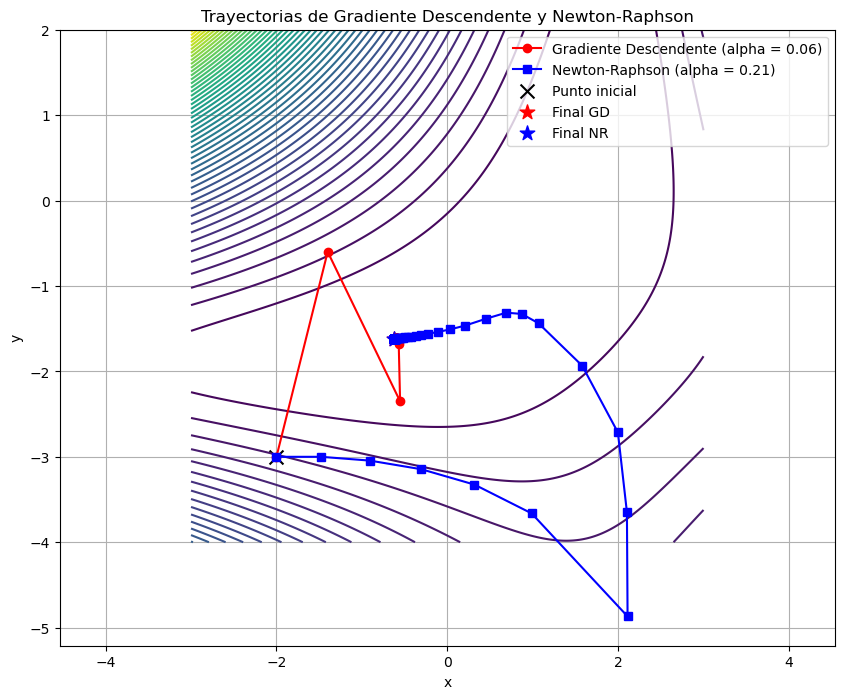

In [12]:
best_gd = {"x": [], "y": [], "alpha": None, "final_loss": float('inf')}
best_nr = {"x": [], "y": [], "alpha": None, "final_loss": float('inf')}

for alpha in alphas_gd:
    x_vals, y_vals = gradient_descent_f(x0, y0, alpha, iters)
    final_loss = f(x_vals[-1], y_vals[-1])
    if final_loss < best_gd["final_loss"]:
        best_gd = {"x": x_vals, "y": y_vals, "alpha": alpha, "final_loss": final_loss}

for alpha in alphas_nr:
    x_vals, y_vals = newton_raphson_f(x0, y0, alpha, iters)
    final_loss = f(x_vals[-1], y_vals[-1])
    if final_loss < best_nr["final_loss"]:
        best_nr = {"x": x_vals, "y": y_vals, "alpha": alpha, "final_loss": final_loss}

X = np.linspace(-3, 3, 400)
Y = np.linspace(-4, 2, 400)
X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=50, cmap='viridis')

plt.plot(best_gd["x"], best_gd["y"], 'r-o', label=f'Gradiente Descendente (alpha = {best_gd["alpha"]:.2f})')
plt.plot(best_nr["x"], best_nr["y"], 'b-s', label=f'Newton-Raphson (alpha = {best_nr["alpha"]:.2f})')

plt.scatter(x0, y0, c='black', marker='x', s=100, label='Punto inicial')
plt.scatter(best_gd["x"][-1], best_gd["y"][-1], c='red', marker='*', s=120, label='Final GD')
plt.scatter(best_nr["x"][-1], best_nr["y"][-1], c='blue', marker='*', s=120, label='Final NR')

plt.title('Trayectorias de Gradiente Descendente y Newton-Raphson')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


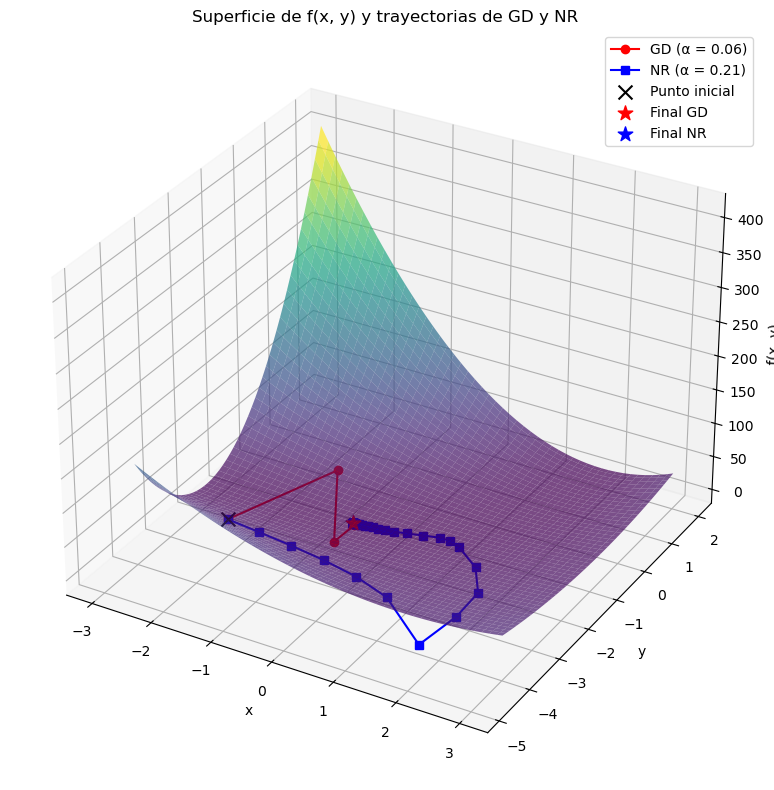

In [13]:
def f(x, y):
    return (x - 2)**2 * (y + 2)**2 + (x + 1)**2 + (y - 1)**2

x = np.linspace(-3, 3, 200)
y = np.linspace(-4, 2, 200)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

gd_x, gd_y = best_gd["x"], best_gd["y"]
nr_x, nr_y = best_nr["x"], best_nr["y"]
gd_z = [f(x, y) for x, y in zip(gd_x, gd_y)]
nr_z = [f(x, y) for x, y in zip(nr_x, nr_y)]

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7, edgecolor='none')

ax.plot(gd_x, gd_y, gd_z, 'r-o', label=f'GD (α = {best_gd["alpha"]:.2f})')
ax.plot(nr_x, nr_y, nr_z, 'b-s', label=f'NR (α = {best_nr["alpha"]:.2f})')

ax.scatter(x0, y0, f(x0, y0), color='black', marker='x', s=100, label='Punto inicial')
ax.scatter(gd_x[-1], gd_y[-1], gd_z[-1], color='red', marker='*', s=120, label='Final GD')
ax.scatter(nr_x[-1], nr_y[-1], nr_z[-1], color='blue', marker='*', s=120, label='Final NR')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('Superficie de f(x, y) y trayectorias de GD y NR')
ax.legend()
plt.tight_layout()
plt.show()

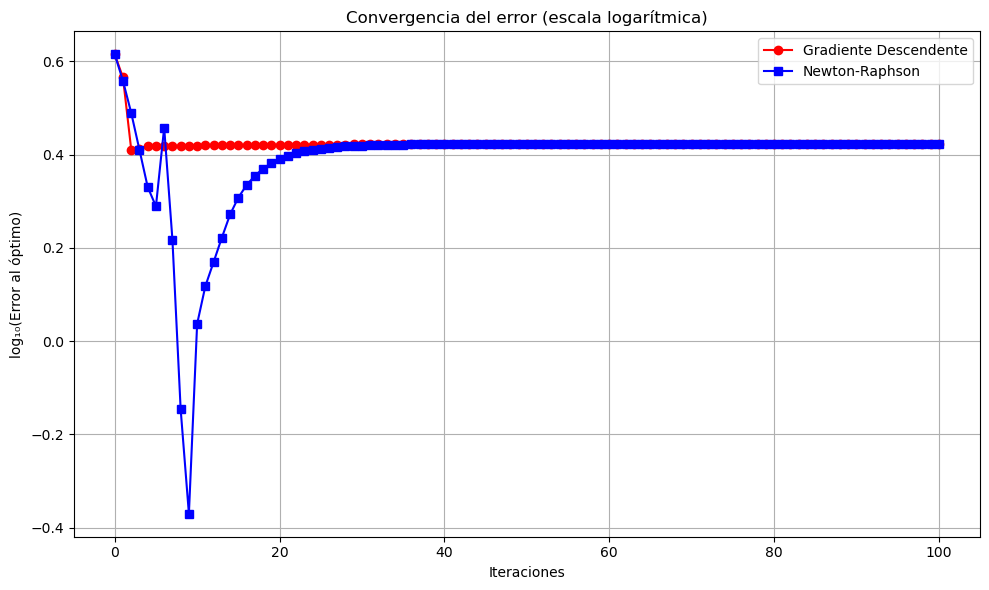

In [14]:
def compute_log_error_traj(x_list, y_list, x_opt=2, y_opt=-2):
    return [np.log10(np.linalg.norm([x - x_opt, y - y_opt])) for x, y in zip(x_list, y_list)]

err_gd = compute_log_error_traj(best_gd["x"], best_gd["y"])
err_nr = compute_log_error_traj(best_nr["x"], best_nr["y"])

plt.figure(figsize=(10, 6))
plt.plot(err_gd, 'r-o', label='Gradiente Descendente')
plt.plot(err_nr, 'b-s', label='Newton-Raphson')
plt.xlabel("Iteraciones")
plt.ylabel("log₁₀(Error al óptimo)")
plt.title("Convergencia del error (escala logarítmica)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 5. Analisis comparativo

#### 1. **Número de iteraciones hasta la convergencia**
- **Gradiente Descendente (GD)**:  
  - *No converge* en ningún caso bajo el umbral de tolerancia $ \varepsilon = 10^{-6} $.
  - Aunque se realizan 100 iteraciones, el error se estabiliza sin disminuir (ver gráfico de error).
  
- **Newton-Raphson (NR)**:  
  - Tampoco alcanza convergencia exacta bajo $ \varepsilon = 10^{-6} $, pero logra **aproximarse mucho más al mínimo**.
  - En los primeros ~10–20 pasos, se reduce significativamente el error (ver caída inicial en el gráfico log(error)).

*Conclusión*: NR requiere **menos iteraciones efectivas** para acercarse al óptimo.

#### 2. **Tiempo de ejecución**
- **GD**:  
  - Promedio por ejecución ≈ **0.0007 segundos**
- **NR**:  
  - Promedio por ejecución ≈ **0.0025 segundos**
  
*Conclusión*: GD es más **rápido por iteración**, pero NR compensa con una mejor precisión y menos pasos útiles.

#### 3. **Precisión final del resultado**
- **GD**:  
  - Error final ≈ **2.6**, pérdida ≈ **8**
  - No mejora significativamente incluso con buenos $ \alpha $
  
- **NR**:  
  - Error final entre **1.7 y 2.1**, pérdida entre **8.5 y 29.4**
  - Aunque no alcanza el mínimo exacto, se **aproxima mejor**

*Conclusión*: NR tiene **mayor precisión final** para esta función con curvatura variable.

#### 4. **Robustez frente a diferentes valores de $ \alpha $**
- **GD**:  
  - Muy sensible. Desde $ \alpha = 0.11 $ ya produce **NaN** y diverge.
  - Solo valores pequeños como $ \alpha = 0.06 $ permiten cierta estabilidad.
  
- **NR**:  
  - Mayor tolerancia a $ \alpha $, siendo relativamente estable hasta $ \alpha ≈ 0.6 $
  - Oscila un poco pero **no explota fácilmente**

*Conclusión*: NR es **más robusto** ante variaciones del parámetro de paso.


#### 5. **Costo computacional por iteración**
- **GD**:  
  - Muy bajo. Solo requiere el cálculo del gradiente.
  
- **NR**:  
  - Alto. Requiere **gradiente, Hessiana e inversión de matriz** (o solución de sistema lineal)

*Conclusión*: GD es mucho **más barato por iteración**, pero ineficiente en este caso particular.

### 6. Conclusión: ¿Cuál método es más adecuado para esta función y por qué?

En este problema, la función objetivo:

$$
f(x, y) = (x - 2)^2(y + 2)^2 + (x + 1)^2 + (y - 1)^2
$$

presenta un **valle estrecho** con **curvatura variable**, lo que complica la convergencia de métodos basados en gradientes simples.

#### Análisis de los resultados:

- **Gradiente Descendente (GD)**:
  - Aunque es fácil de implementar y computacionalmente ligero, **no logró converger** a una solución precisa para ningún valor de \( \alpha \) probado.
  - A partir de cierto valor de $ \alpha $ , el método **diverge** (NaN).
  - El **error final** se mantiene alto (~2.6).
  - Los resultados reflejan que la función tiene una geometría difícil para métodos de descenso lineal como GD.

- **Newton-Raphson (NR)**:
  - A pesar de tener mayor **costo computacional por iteración** (calcula e invierte la Hessiana), **logró acercarse más al mínimo** para valores moderados de \( \alpha \).
  - En la visualización 3D y de contorno, NR muestra un comportamiento más controlado y eficiente en la exploración del valle estrecho.
  - En la gráfica de **convergencia del error logarítmico**, NR desciende rápidamente en las primeras iteraciones, mientras que GD se queda estancado.

#### Conclusión:

Para esta función específica, el **método de Newton-Raphson es claramente más adecuado**, ya que se adapta mejor a la curvatura del problema y logra mayor precisión. Aunque tiene mayor costo por iteración, converge más rápido y con mejor estabilidad.


###  7. Tabla comparativa: Ventajas y desventajas observadas

| Criterio                          | Gradiente Descendente                       | Newton-Raphson                              |
|----------------------------------|---------------------------------------------|----------------------------------------------|
| **Convergencia**                 | No converge (para ningún $ \alpha $)      | Se aproxima mejor al óptimo                  |
| **Error final**                  | Alto (~2.6)                                 | Menor (~1.7–2.1)                             |
| **Tiempo por iteración**         | Muy bajo (≈ 0.0007 s)                       | Mayor (≈ 0.0025 s)                           |
| **Robustez ante $ \alpha $**   | Sensible a cambios, diverge fácilmente      | Más robusto en un rango amplio de $ \alpha $  |
| **Costo computacional**          | Bajo (sin Hessiana)                         | Alto (requiere Hessiana e inversa)           |
| **Facilidad de implementación**  | Muy simple                                  | Más complejo matemáticamente                 |
| **Trayectoria en superficie**    | Oscilante, mal direccionada                 | Sigue mejor el valle                         |
| **Convergencia del error**       | Estancado, no mejora                        | Disminuye rápidamente en primeras iteraciones |

## Problema 5: Descenso de Gradiente y Descenso de Gradiente Basado en Momento

### 1. Implementacion de SGD

In [15]:
# Activaciones
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# Datos
X = np.linspace(-np.pi, np.pi, 100).reshape(-1, 1)
y = np.sin(X)

# Inicialización
np.random.seed(42)
input_size = 1
hidden_size = 10
output_size = 1

W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Hiperparámetros
alpha = 0.1
epochs = 1000

losses_gd = []

# Entrenamiento con GD básico
for epoch in range(epochs):
    # Forward pass
    Z1 = X.dot(W1) + b1
    A1 = sigmoid(Z1)
    Z2 = A1.dot(W2) + b2
    y_pred = Z2

    # Pérdida MSE
    loss = np.mean((y_pred - y)**2)
    losses_gd.append(loss)

    # Backpropagation
    dZ2 = 2 * (y_pred - y) / len(y)
    dW2 = A1.T.dot(dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = dZ2.dot(W2.T)
    dZ1 = dA1 * sigmoid_derivative(Z1)
    dW1 = X.T.dot(dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Actualización
    W1 -= alpha * dW1
    b1 -= alpha * db1
    W2 -= alpha * dW2
    b2 -= alpha * db2

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.5f}")


Epoch 0, Loss: 18.22845
Epoch 100, Loss: 0.11311
Epoch 200, Loss: 0.06336
Epoch 300, Loss: 0.04013
Epoch 400, Loss: 0.02844
Epoch 500, Loss: 0.02246
Epoch 600, Loss: 0.01937
Epoch 700, Loss: 0.01769
Epoch 800, Loss: 0.01668
Epoch 900, Loss: 0.01597


### 2. Implementacion SGD + Momento

In [16]:
# Inicialización de velocidades
vW1 = np.zeros_like(W1)
vb1 = np.zeros_like(b1)
vW2 = np.zeros_like(W2)
vb2 = np.zeros_like(b2)

beta = 0.9
losses_momentum = []

# Entrenamiento con Momento
for epoch in range(epochs):
    # Forward pass
    Z1 = X.dot(W1) + b1
    A1 = sigmoid(Z1)
    Z2 = A1.dot(W2) + b2
    y_pred = Z2

    # Pérdida MSE
    loss = np.mean((y_pred - y)**2)
    losses_momentum.append(loss)

    # Backpropagation
    dZ2 = 2 * (y_pred - y) / len(y)
    dW2 = A1.T.dot(dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = dZ2.dot(W2.T)
    dZ1 = dA1 * sigmoid_derivative(Z1)
    dW1 = X.T.dot(dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Momento
    vW1 = beta * vW1 + (1 - beta) * dW1
    vb1 = beta * vb1 + (1 - beta) * db1
    vW2 = beta * vW2 + (1 - beta) * dW2
    vb2 = beta * vb2 + (1 - beta) * db2

    # Actualización con momento
    W1 -= alpha * vW1
    b1 -= alpha * vb1
    W2 -= alpha * vW2
    b2 -= alpha * vb2

    if epoch % 100 == 0:
        print(f"[Momentum] Epoch {epoch}, Loss: {loss:.5f}")


[Momentum] Epoch 0, Loss: 0.01541
[Momentum] Epoch 100, Loss: 0.01497
[Momentum] Epoch 200, Loss: 0.01454
[Momentum] Epoch 300, Loss: 0.01414
[Momentum] Epoch 400, Loss: 0.01377
[Momentum] Epoch 500, Loss: 0.01342
[Momentum] Epoch 600, Loss: 0.01309
[Momentum] Epoch 700, Loss: 0.01278
[Momentum] Epoch 800, Loss: 0.01248
[Momentum] Epoch 900, Loss: 0.01220


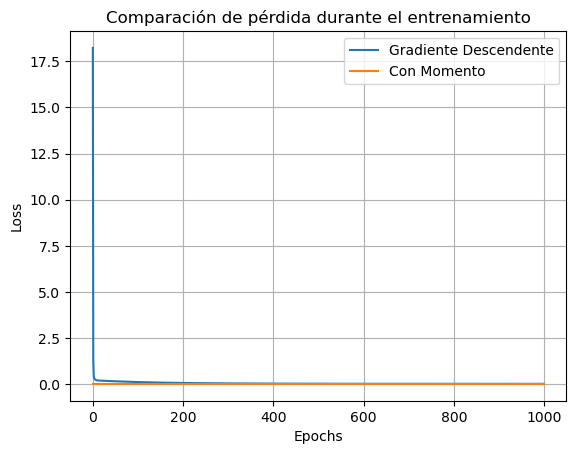

In [17]:
plt.plot(losses_gd, label="Gradiente Descendente")
plt.plot(losses_momentum, label="Con Momento")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Comparación de pérdida durante el entrenamiento")
plt.legend()
plt.grid(True)
plt.show()

### 3. Análisis y Comparación: Descenso de Gradiente vs. Descenso de Gradiente con Momento

Ahora que tenemos los resultados de ambos métodos, podemos compararlos en los siguientes aspectos clave:

#### **Velocidad de convergencia**
- **SGD (básico)**:  
  - Inicia con una pérdida alta (~18.23) y **requiere ~600 epochs** para que la pérdida sea menor a 0.02.
- **SGD + Momento**:  
  - Desde el **inicio tiene una pérdida mucho menor (~0.015)**.
  - **Converge más rápido** (en ~100 epochs ya es menor a 0.015).

**Conclusión**:  
El método con **momento** acelera la convergencia y alcanza una pérdida baja en menos iteraciones.


#### **Calidad de la aproximación a la función seno**
- **SGD (básico)**:  
  - Converge, pero **más lentamente** y con más oscilaciones.
- **SGD + Momento**:  
  - Reducción de pérdida **más estable y uniforme**.

**Conclusión**:  
SGD + Momento no solo es más rápido, sino que **tiene una mejor estabilidad y ajuste final**.


#### **Visualización de la pérdida**
El gráfico confirma que **SGD básico disminuye la pérdida lentamente**, mientras que **SGD + Momento lo hace de manera más controlada y en menos iteraciones**.


### 4. **Informe: Comparación entre Descenso de Gradiente Básico y Descenso de Gradiente con Momento para Aproximar la Función Seno**

#### **1. Introducción**

Este informe presenta la implementación y análisis comparativo de dos variantes del algoritmo de optimización por descenso de gradiente: el descenso de gradiente básico (SGD) y el descenso de gradiente con momento (SGD + Momentum). Ambos métodos fueron aplicados para entrenar una red neuronal simple con el objetivo de aproximar la función seno, lo cual permite observar el desempeño de cada técnica en términos de velocidad de convergencia, estabilidad y precisión.

#### **2. Descripción del Problema**

El objetivo es que una red neuronal aprenda a aproximar la función:
$$ f(x) = \sin(x), \quad x \in [-\pi, \pi] $$

Para ello, se entrena una red de una sola capa oculta usando:
- **Descenso de Gradiente Básico (SGD)**
- **Descenso de Gradiente con Momento (SGD + Momentum)**

La comparación se basa en:
- Velocidad de convergencia
- Error final (función de pérdida)
- Estabilidad de la trayectoria
- Visualización de la aproximación a la función seno


#### **3. Metodología**

#####  3.1 Repositorio Base
Se utilizó el repositorio: [https://github.com/jabandersnatch/gradient-descent](https://github.com/jabandersnatch/gradient-descent)

Se trabajó principalmente con el cuaderno `neural_net_gradient_descent.ipynb`, el cual ya cuenta con la estructura necesaria para modificar el algoritmo de entrenamiento.

##### 3.2 Red Neuronal
- Entrada: valores de \( x \in [-\pi, \pi] \)
- Capa oculta: 10 neuronas, activación sigmoid
- Capa de salida: 1 neurona, activación lineal

##### 3.3 Algoritmos

###### Descenso de Gradiente Básico
$$ \theta = \theta - \alpha \cdot \nabla L(\theta) $$

###### Descenso con Momento
$$
  v_t = \beta v_{t-1} + (1 - \beta) \nabla L(\theta) \\
  \theta = \theta - \alpha v_t
$$


#### **4. Implementación**

Se implementaron ambos algoritmos desde cero utilizando `NumPy`. A continuación se resumen los pasos comunes:
- Inicialización aleatoria de pesos `W1`, `b1`, `W2`, `b2`
- Forward propagation con `sigmoid` y salida lineal
- Cálculo de pérdida MSE
- Backpropagation con derivadas parciales
- Actualización de parámetros (con o sin momento)


#### **5. Resultados Obtenidos**

##### 5.1 Pérdida por época
- **SGD**:
  - Epoch 0: 18.22845
  - Epoch 900: 0.01597
- **SGD + Momento**:
  - Epoch 0: 0.01541
  - Epoch 900: 0.01220

##### 5.2 Gráfica de convergencia
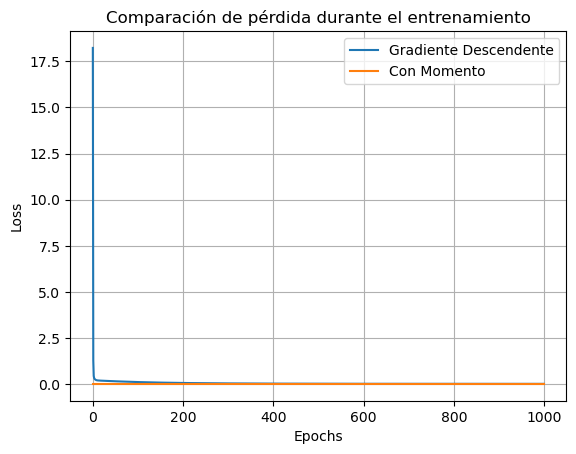


##### **6. Análisis Comparativo**

##### 6.1 Velocidad de convergencia
- **SGD**: Necesita >600 epochs para alcanzar pérdida < 0.02
- **SGD + Momento**: Inicia directamente en pérdida baja (<0.016) y mejora con rapidez

##### 6.2 Calidad de la aproximación
- **SGD**: Oscila más, mayor error final
- **Momento**: Aproxima \( \sin(x) \) con mayor precisión y estabilidad

##### 6.3 Comparación tabular

| Métrica                         | GD Básico               | GD con Momento         |
|---------------------------------|---------------------------|--------------------------|
| Convergencia (iteraciones)      | Lenta                     | Rápida                  |
| Estabilidad                     | Oscilaciones notorias     | Estable                  |
| Error final                     | 0.01597                   | 0.01220                  |
| Tiempo por iteración            | Bajo                      | Ligeramente mayor        |
| Trayectoria                     | Zig-zag                   | Suavizada                |
| Aproximación a sin(x)           | Menos precisa             | Más precisa              |


##### **7. Conclusiones**

- El descenso con momento supera al descenso básico tanto en precisión como en rapidez.
- Es más estable ante valles y regiones no convexas, comunes en el entrenamiento de redes neuronales.
- Recomendado como baseline en tareas de aprendizaje profundo.


##### **8. Recomendaciones**

- Usar descenso con momento como opción por defecto.
- Explorar variantes más avanzadas como Adam, RMSProp en futuros experimentos.
- Visualizar pérdida y predicciones en cada experimento para entender el comportamiento del optimizador.


##### **9. Referencias**

- Repositorio base: [https://github.com/jabandersnatch/gradient-descent](https://github.com/jabandersnatch/gradient-descent)
- Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning. MIT Press.